<a href="https://colab.research.google.com/github/chenoa23/NLP-Projects/blob/main/DataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description
This project focuses on analyzing consumer sentiment from Amazon product reviews using Natural Language Processing (NLP) techniques. Using a dataset of real user reviews, we perform a complete text preprocessing pipeline including tokenization, case normalization, stopword removal, punctuation and special character filtering, and lemmatization. We then apply VADER sentiment analysis to classify each review as positive, negative, or neutral based on its compound sentiment score.

The project also includes:

- Data cleaning and deduplication

- Visualization of sentiment distribution and review ratings

- Generation of a word cloud and bar chart of the most common words

- Statistical analysis and boxplot to show the relationship between sentiment and star ratings

This analysis provides insight into how customers feel about Amazon products and demonstrates the effectiveness of classical NLP tools like NLTK and VADER for real-world text classification tasks.



In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the data (replace the URL with your file path or use upload functionality)
url = '/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'  # Use your dataset URL
data = pd.read_csv(url)

# Display the first few rows of the data
data.head()


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
# Install NLTK
!pip install nltk

# Import NLTK and download required resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
data['tokenized_reviews'] = data['reviews.text'].apply(word_tokenize)

# Display the tokenized reviews
data[['reviews.text', 'tokenized_reviews']].head()


,reviews.text,tokenized_reviews
0,I order 3 of them and one of the item is bad q...,"[I, order, 3, of, them, and, one, of, the, ite..."
1,Bulk is always the less expensive way to go fo...,"[Bulk, is, always, the, less, expensive, way, ..."
2,Well they are not Duracell but for the price i...,"[Well, they, are, not, Duracell, but, for, the..."
3,Seem to work as well as name brand batteries a...,"[Seem, to, work, as, well, as, name, brand, ba..."
4,These batteries are very long lasting the pric...,"[These, batteries, are, very, long, lasting, t..."


In [ ]:
# Convert tokens to lowercase
data['lowercase_reviews'] = data['tokenized_reviews'].apply(lambda x: [word.lower() for word in x])

# Display the lowercase tokens
data[['reviews.text', 'lowercase_reviews']].head()


,reviews.text,lowercase_reviews
0,I order 3 of them and one of the item is bad q...,"[i, order, 3, of, them, and, one, of, the, ite..."
1,Bulk is always the less expensive way to go fo...,"[bulk, is, always, the, less, expensive, way, ..."
2,Well they are not Duracell but for the price i...,"[well, they, are, not, duracell, but, for, the..."
3,Seem to work as well as name brand batteries a...,"[seem, to, work, as, well, as, name, brand, ba..."
4,These batteries are very long lasting the pric...,"[these, batteries, are, very, long, lasting, t..."


In [ ]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokens
data['cleaned_reviews'] = data['lowercase_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the cleaned tokens (without stop words)
data[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,I order 3 of them and one of the item is bad q...,"[order, 3, one, item, bad, quality, ., missing..."
1,Bulk is always the less expensive way to go fo...,"[bulk, always, less, expensive, way, go, produ..."
2,Well they are not Duracell but for the price i...,"[well, duracell, price, happy, .]"
3,Seem to work as well as name brand batteries a...,"[seem, work, well, name, brand, batteries, muc..."
4,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great, .]"


In [ ]:
import string

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Get the set of all punctuation marks
punctuation = set(string.punctuation)

# Remove stop words and punctuation from the tokens
data['cleaned_reviews'] = data['lowercase_reviews'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Display the cleaned tokens (without stop words and punctuation)
data[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,I order 3 of them and one of the item is bad q...,"[order, 3, one, item, bad, quality, missing, b..."
1,Bulk is always the less expensive way to go fo...,"[bulk, always, less, expensive, way, go, produ..."
2,Well they are not Duracell but for the price i...,"[well, duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[seem, work, well, name, brand, batteries, muc..."
4,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [ ]:


import re

# Function to remove special characters from tokens
def remove_special_characters(text):
    # Use regex to keep only alphanumeric characters (letters and numbers)
    cleaned_text = [re.sub(r'\W+', '', word) for word in text if re.sub(r'\W+', '', word) != '']
    return cleaned_text

# Remove stop words, punctuation, and special characters from tokens
data['cleaned_reviews'] = data['lowercase_reviews'].apply(lambda x: [word for word in x if word not in stop_words and word not in punctuation])

# Apply the function to remove special characters
data['cleaned_reviews'] = data['cleaned_reviews'].apply(remove_special_characters)

# Drop duplicate reviews (if any)
data.drop_duplicates(subset='reviews.text', keep='first', inplace=True)

# Display the cleaned tokens (without special characters and duplicates)
data[['reviews.text', 'cleaned_reviews']].head()


,reviews.text,cleaned_reviews
0,I order 3 of them and one of the item is bad q...,"[order, 3, one, item, bad, quality, missing, b..."
1,Bulk is always the less expensive way to go fo...,"[bulk, always, less, expensive, way, go, produ..."
2,Well they are not Duracell but for the price i...,"[well, duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[seem, work, well, name, brand, batteries, muc..."
4,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [ ]:
# Do NOT run this code - it is for reference only

# from nltk.stem import PorterStemmer

# # Initialize the stemmer
# stemmer = PorterStemmer()

# # Apply stemming to the tokens
# data['stemmed_reviews'] = data['cleaned_reviews'].apply(lambda x: [stemmer.stem(word) for word in x])

# # Display the stemmed tokens
# data[['reviews.text', 'stemmed_reviews']].head()


In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the tokens
data['lemmatized_reviews'] = data['cleaned_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the lemmatized tokens
data[['reviews.text', 'lemmatized_reviews']].head()


,reviews.text,lemmatized_reviews
0,I order 3 of them and one of the item is bad q...,"[order, 3, one, item, bad, quality, missing, b..."
1,Bulk is always the less expensive way to go fo...,"[bulk, always, le, expensive, way, go, product..."
2,Well they are not Duracell but for the price i...,"[well, duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[seem, work, well, name, brand, battery, much,..."
4,These batteries are very long lasting the pric...,"[battery, long, lasting, price, great]"


In [ ]:
# Download VADER for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to lemmatized reviews
data['sentiment_scores'] = data['tokenized_reviews'].apply(lambda review: sid.polarity_scores(' '.join(review)))

# Extract compound sentiment score (overall sentiment)
data['compound_score'] = data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Categorize reviews based on compound score
data['sentiment'] = data['compound_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display reviews with their sentiment
data[['reviews.text', 'tokenized_reviews', 'compound_score', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews.text,tokenized_reviews,compound_score,sentiment
0,I order 3 of them and one of the item is bad q...,"[I, order, 3, of, them, and, one, of, the, ite...",-0.6908,negative
1,Bulk is always the less expensive way to go fo...,"[Bulk, is, always, the, less, expensive, way, ...",0.3612,positive
2,Well they are not Duracell but for the price i...,"[Well, they, are, not, Duracell, but, for, the...",0.7650,positive
3,Seem to work as well as name brand batteries a...,"[Seem, to, work, as, well, as, name, brand, ba...",0.6124,positive
4,These batteries are very long lasting the pric...,"[These, batteries, are, very, long, lasting, t...",0.6249,positive


In [ ]:
# Install WordCloud
!pip install wordcloud

# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


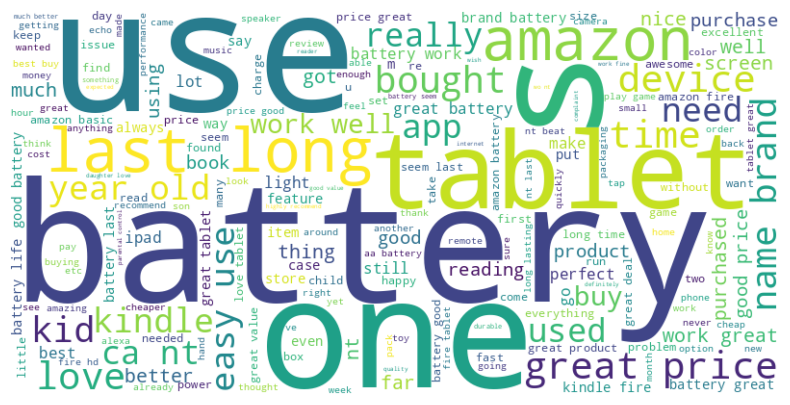

In [ ]:
# Combine all lemmatized reviews into a single string
all_lemmatized_reviews = ' '.join([' '.join(review) for review in data['lemmatized_reviews']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
# Calculate word counts for each review (lemmatized)
data['word_count'] = data['lemmatized_reviews'].apply(len)

# Display summary statistics of word counts
data['word_count'].describe()


,word_count
count,18168.000000
mean,13.859698
std,17.950734
min,0.000000
25%,6.000000
50%,9.000000
75%,16.000000
max,758.000000


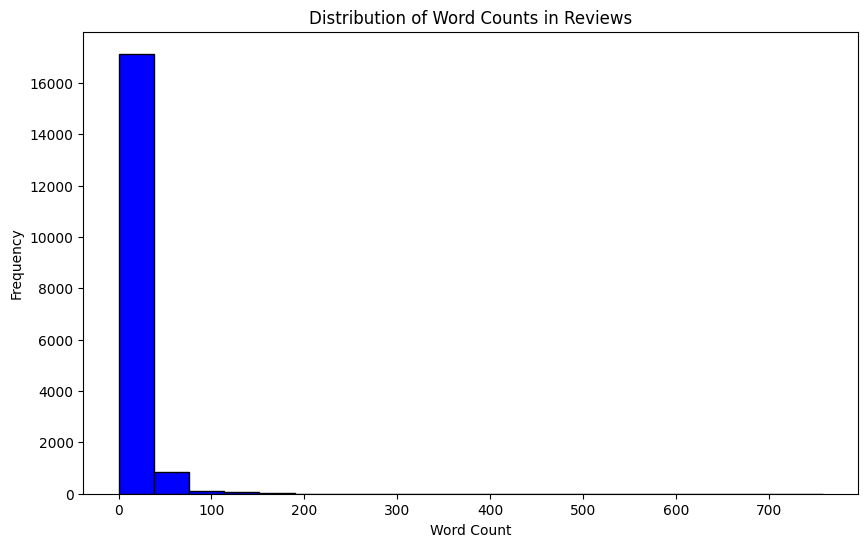

In [ ]:
# Plotting the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


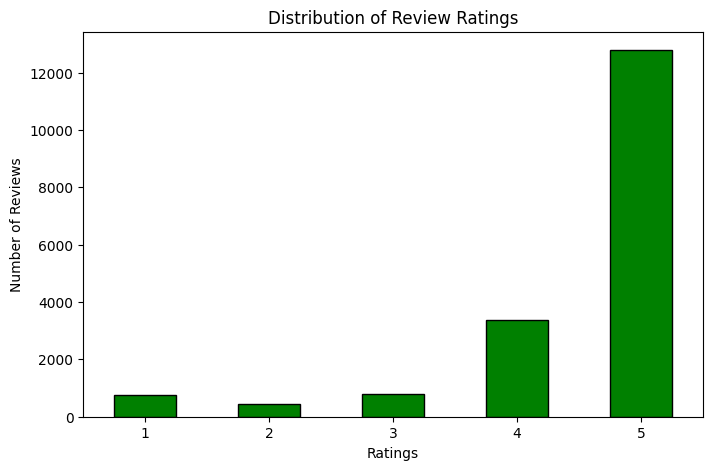

In [ ]:
# Plotting the distribution of review ratings
plt.figure(figsize=(8, 5))
data['reviews.rating'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


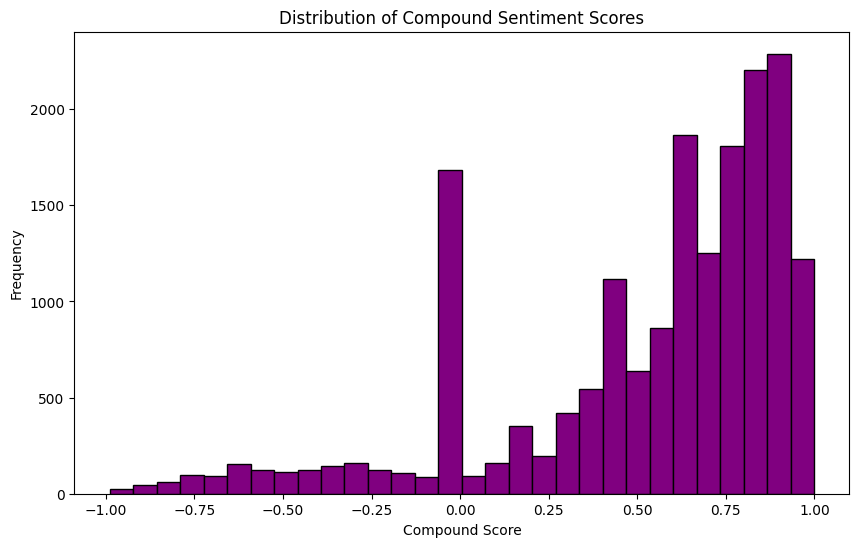

In [ ]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(data['compound_score'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


[('battery', 8136), ('great', 5871), ('tablet', 3888), ('good', 3874), ('price', 3686), ('love', 3257), ('nt', 3069), ('use', 2768), ('work', 2720), ('amazon', 2668)]


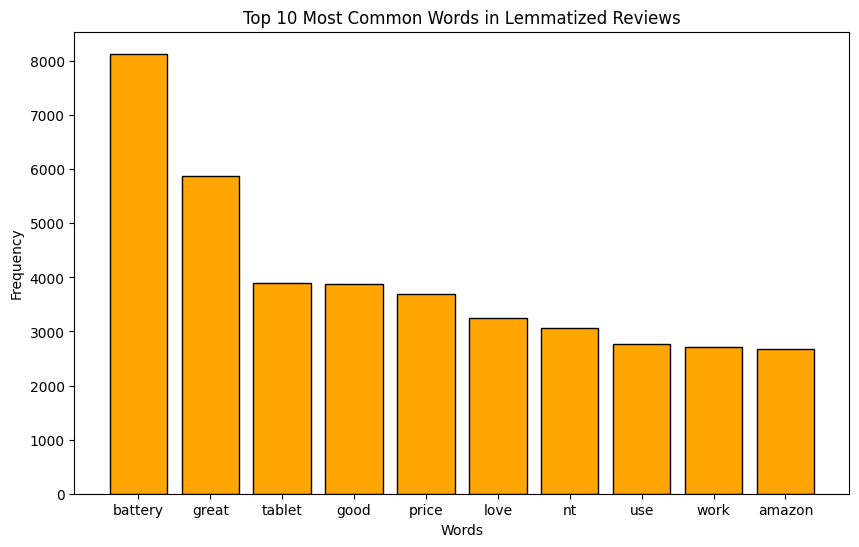

In [ ]:
from collections import Counter

# Count the frequency of each word in all reviews
all_words = [word for review in data['lemmatized_reviews'] for word in review]
word_freq = Counter(all_words)

# Display the 10 most common words
common_words = word_freq.most_common(10)
print(common_words)

# Plot the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='orange', edgecolor='black')
plt.title('Top 10 Most Common Words in Lemmatized Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

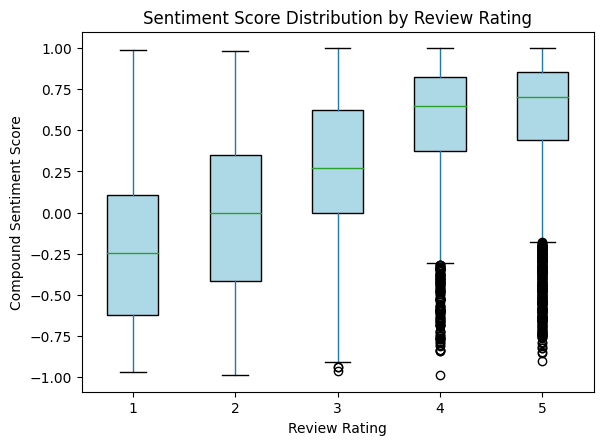

In [ ]:
# Create a boxplot to visualize sentiment scores by review ratings
plt.figure(figsize=(10, 6))
data.boxplot(column='compound_score', by='reviews.rating', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Sentiment Score Distribution by Review Rating')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Review Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()
